# Basic Medical Data Exploration Visualization  Heart Diseases

[Source](https://towardsdatascience.com/basic-medical-data-exploration-visualization-heart-diseases-6ab12bc0a8b7)

In this lecture we're going to learn how to use [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) by following along with the following example. As always, the source author's link is listed for reference. This page will evolve over time.

## Dataset

The dataset we'll use here is the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) containing 302 patient data each with 75 attributes. However, this example only uses 14 of them which can be seen below.

The columns used include:
1. age: age in years
2. sex: sex
    * 1 = male
    * 0 = female
3. cp: chest pain type 
    * Value 1: typical angina 
    * Value 2: atypical angina 
    * Value 3: non-anginal pain 
    * Value 4: asymptomatic 
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl 
6. fbs: fasting blood sugar > 120 mg/dl
    * 1 = true
    * 0 = false
7. restecg:  restecg: resting electrocardiographic results 
    * Value 0: normal 
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak: ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment 
    * Value 1: upsloping 
    * Value 2: flat 
    * Value 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect 
14. num: diagnosis of heart disease (angiographic disease status) 
    * Value 0: < 50% diameter narrowing 
    * Value 1: > 50% diameter narrowing 

In [1]:
columns = ["age", 
           "sex", 
           "cp", 
           "trestbps",
           "chol", 
           "fbs", 
           "restecg",
           "thalach",
           "exang", 
           "oldpeak",
           "slope", 
           "ca", 
           "thal", 
           "num"]

In [2]:
# disable warnings for lecture
import warnings
warnings.filterwarnings('ignore')

## Overview of the Data Set , Cleaning, and Viewing

In [3]:
import pandas as pd

# import the data and see the basic description
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
df.columns = columns

In [4]:
print("---- Describe ----")
print(df.describe())

---- Describe ----
              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.410596    0.678808    3.165563  131.645695  246.738411    0.145695   
std      9.040163    0.467709    0.953612   17.612202   51.856829    0.353386   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000  
mean     0.986755  149.605960    0.327815    1.035430    1.596026    0.940397  
std      0.

In [5]:
print('---- Info -----')
print(df.info())

---- Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
age         302 non-null float64
sex         302 non-null float64
cp          302 non-null float64
trestbps    302 non-null float64
chol        302 non-null float64
fbs         302 non-null float64
restecg     302 non-null float64
thalach     302 non-null float64
exang       302 non-null float64
oldpeak     302 non-null float64
slope       302 non-null float64
ca          302 non-null object
thal        302 non-null object
num         302 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.1+ KB
None


We notice above that the ```ca``` and ```thal``` data elements are objects which we'll likely want to remap. Let's take a look at the data.

In [6]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [7]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

From the codbook above we see these are coded values that we can remap.

In [8]:
# Replace Every Number greater than 0 to 1 to mark heart disease
df.loc[df['num'] > 0 , 'num'] = 1
df.ca = pd.to_numeric(df.ca, errors='coerce').fillna(0)
df.thal = pd.to_numeric(df.thal, errors='coerce').fillna(0)

In [9]:
df['thal'].unique()

array([3., 7., 6., 0.])

In [10]:
df['ca'].unique()

array([3., 2., 0., 1.])

Now we can view the datatypes of the remapped data to ```float64``` and ```int64```.

In [11]:
print('---- Dtype ----')
print(df.dtypes)

---- Dtype ----
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


Next we'll want to 

In [12]:
print('---- Null Data ----')
# count how many null values exist
print(df.isnull().sum())

---- Null Data ----
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [13]:
# quickly check to see if there are any null values
print(df.isnull().values.any())

False


After doing simple clean up, changing non-numerical value to NaN and replacing NaN with 0 we can safely say our data is somewhat clean.

## First / Last 10 Rows


In [14]:
# print the first 10 and last 10
print('------ First 10 -------')
df.head(10)

------ First 10 -------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [15]:
#  Last 10 
print('------ Last 10 -------')
df.tail(10)

------ Last 10 -------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
292,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,1
293,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
294,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
295,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,1
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


## Plotting Histograms

After reviewing the data in tabular form we want to visualize all of the data across the variables. We can do this easily with a histogram.

In [16]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

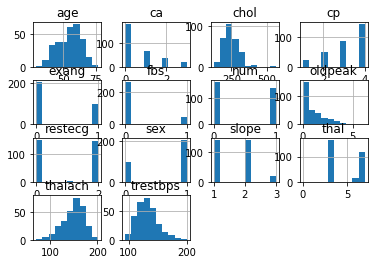

In [17]:
# using pandas to generate the plots
df.hist()

# using matplotlib to render (or show) the plot
plt.show()

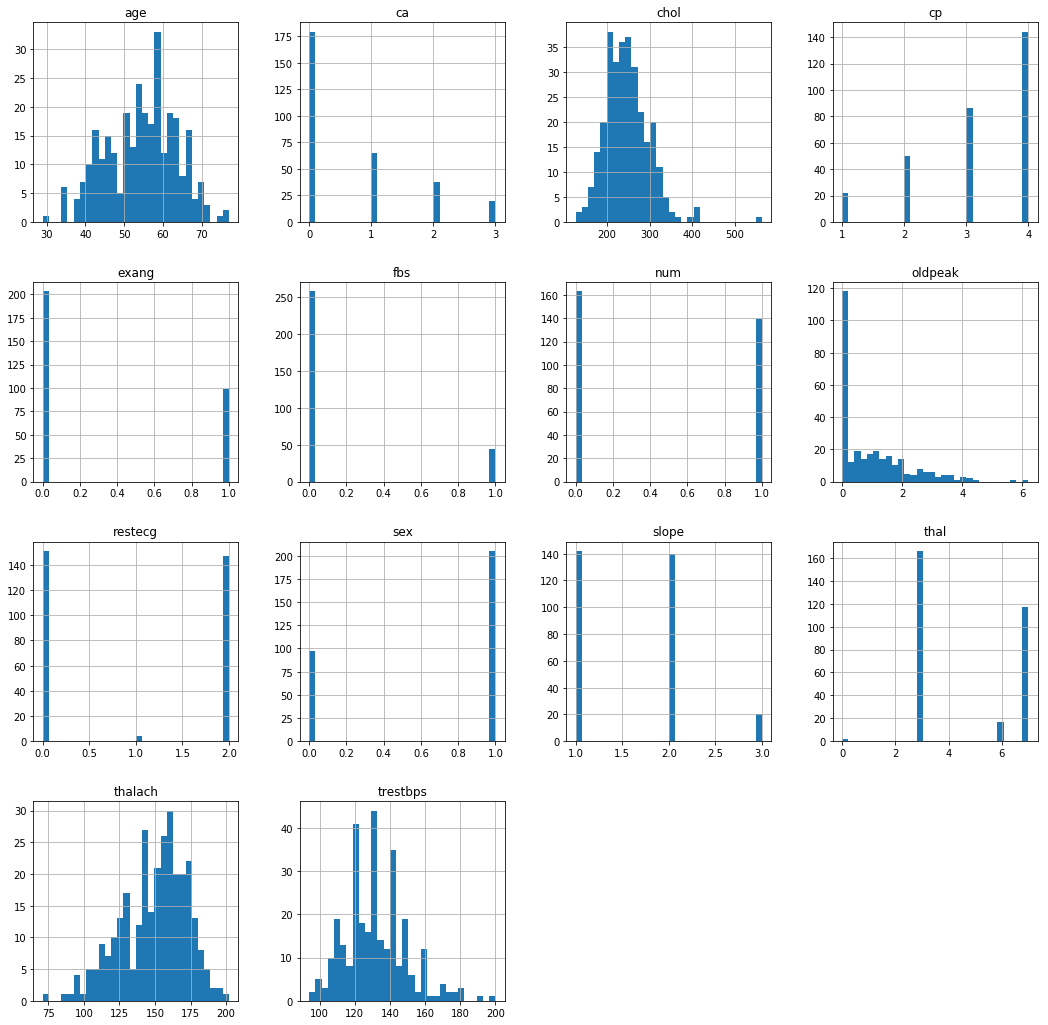

In [18]:
# get the histogram of every data points
fig = plt.figure(figsize = (18, 18))
ax = fig.gca()

df.hist(ax=ax, bins=30)
plt.show()

With simple histogram of our data, we can easily observe the distribution of different attributes. One thing to note here is the fact that it is extremely easy for us to see which attributes are categorical values and which are not.

We can inspect a little bit more closely and take a look at the distribution of ages and fbs (fasting blood sugar). We can see that the age distribution is closely resembling of Gaussian distribution while fbs is a categorical value.

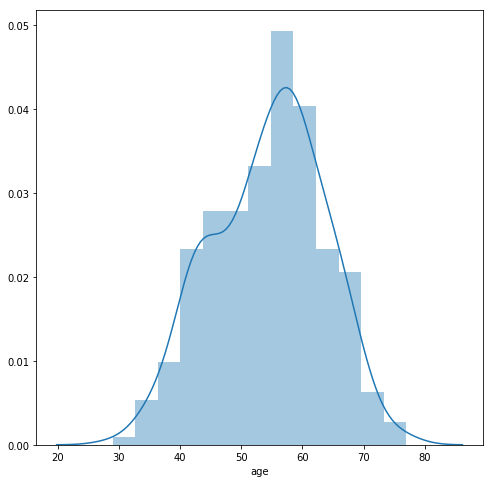

In [19]:
# import seaborn
import seaborn as sns

# a closer look at age
plt.figure(figsize=(8, 8))
sns.distplot(df.age)
plt.show()
plt.close('all')

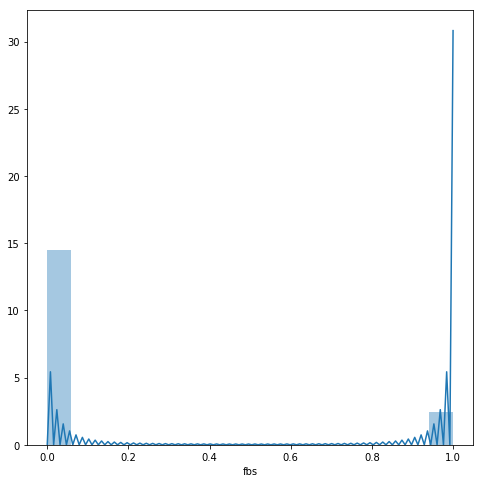

In [20]:
# a closer look at fbs
plt.figure(figsize=(8, 8))
sns.distplot(df.fbs)
plt.show()

## Variance-Covariance Matrix

We can calculate variance-covariance matrices in a number of ways. First we'll use Numpy and then we'll use the built-in Dataframe functrion. Once calculated, we can observe that most attributes do not have a strong covariance relationship.

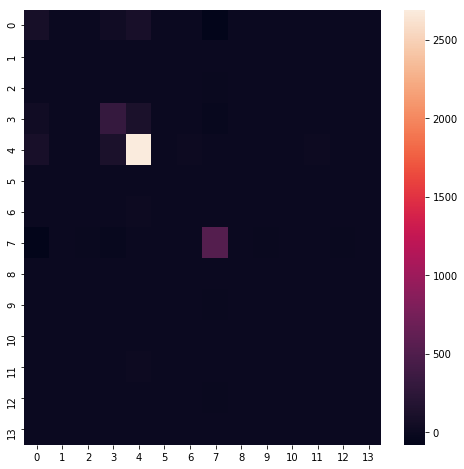

In [21]:
import numpy as np
from numpy import dot

# calculate the Variance-Covariance Matrix 
sample = df.values
sample = sample - dot(np.ones((sample.shape[0],sample.shape[0])),sample)/(len(sample)-1)
covv = dot(sample.T,sample)/(len(sample)-1)
plt.figure(figsize=(8,8))
sns.heatmap(covv)
plt.show()

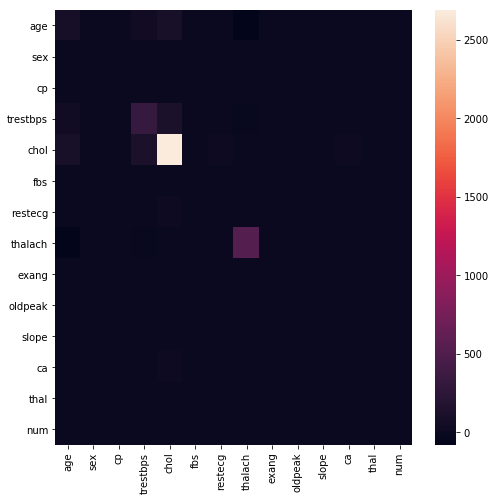

In [22]:
# compare with built in 
plt.figure(figsize=(8,8))
sns.heatmap(df.cov())
plt.show()

## Correlation matrix

Similarly, the first image is created by manual numpy calculation and the second using the bulit-in method. Ee can observe that among the attributes there are actually strong correlation with one another. (especially heart disease and thal).

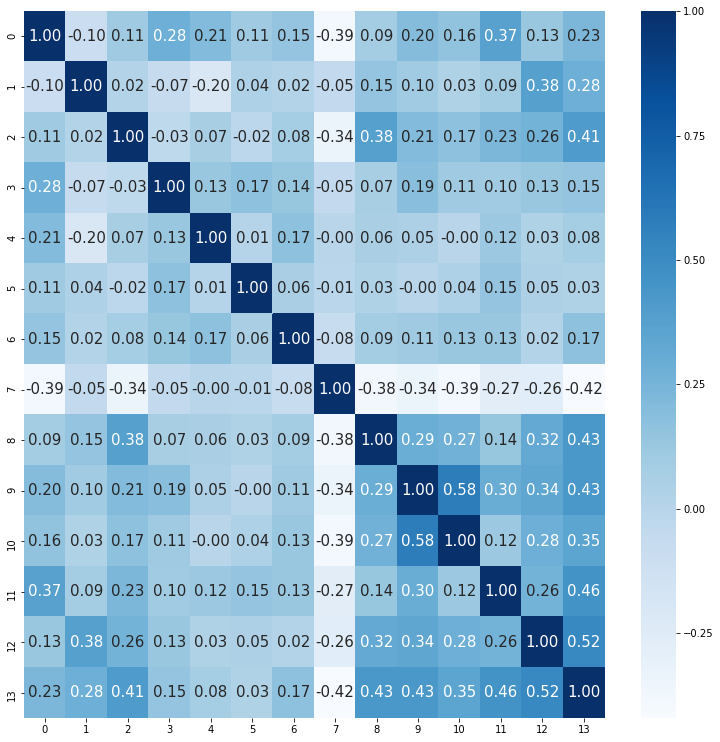

In [23]:
# calculate correaltion matrix 
sample = df.values
certering_mat = np.diag(np.ones((302))) - np.ones((302,302))/302
std_matrix = np.diag(np.std(sample,0))
temp = dot(certering_mat,dot(sample, np.linalg.inv(std_matrix)  ))
temp = dot(temp.T,temp)/len(sample)

# plot
plt.figure(figsize=(13, 13))
sns.heatmap(np.around(temp,2),annot=True,fmt=".2f",cmap="Blues",annot_kws={"size": 15})
plt.show()

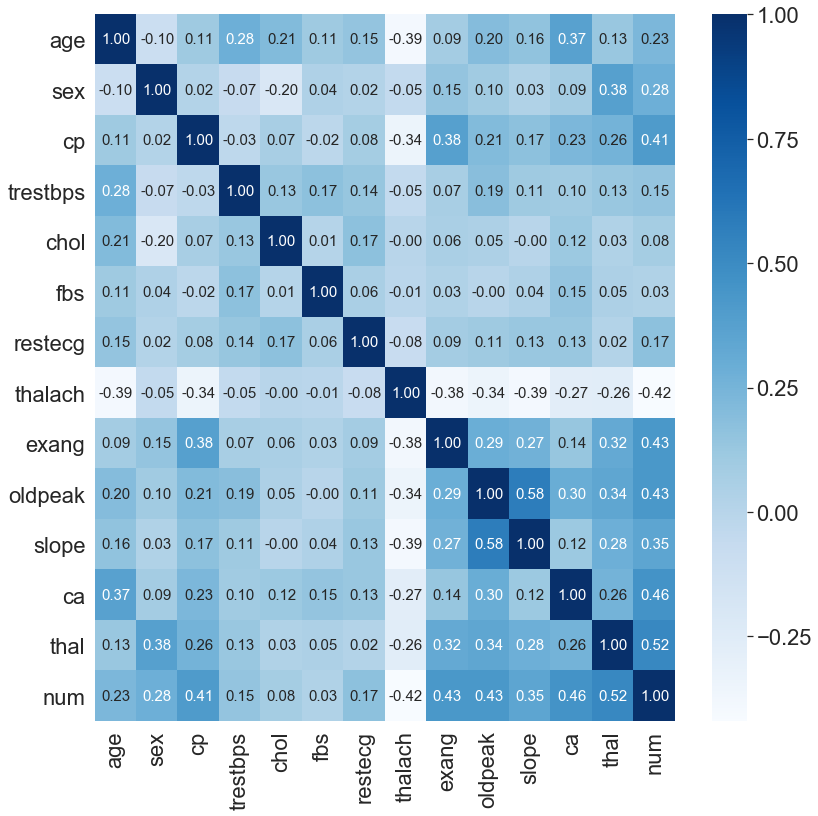

In [24]:
# correaltion matrix 
sns.set(font_scale=2)
plt.figure(figsize=(13,13))

sns.heatmap(df.corr().round(2),annot=True,fmt=".2f",cmap="Blues",annot_kws={"size": 15})
plt.show()

## Interactive Histogram

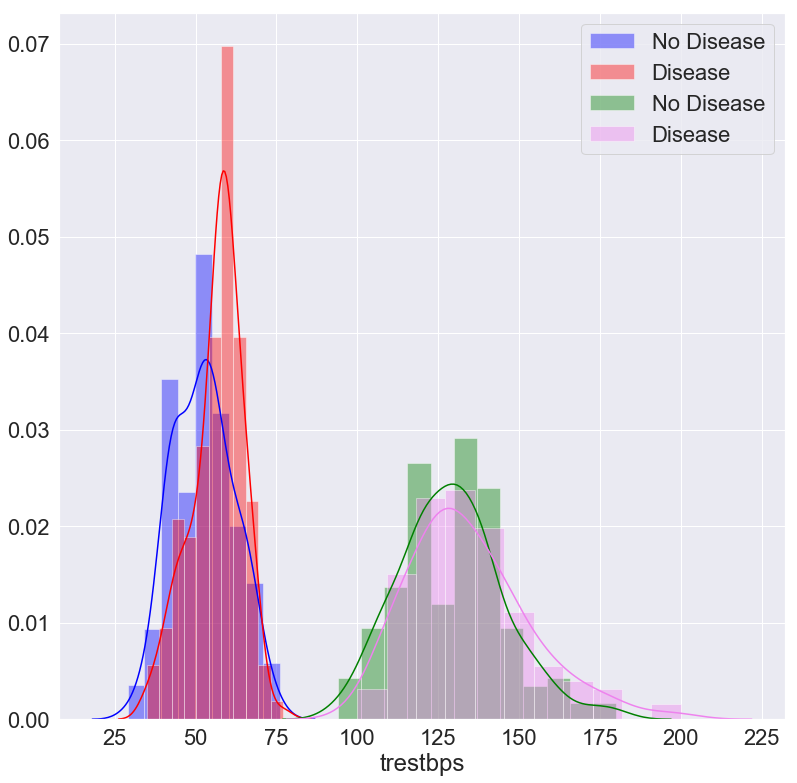

In [25]:
# plot the people who have heart vs not 
plt.figure(figsize=(13, 13))
sns.distplot(df.age[df.num==0], label='No Disease', color='blue')
sns.distplot(df.age[df.num==1], label='Disease', color='Red')
sns.distplot(df.trestbps[df.num==0],label= 'No Disease', color='Green')
sns.distplot(df.trestbps[df.num==1], label='Disease', color='violet')
plt.legend()
plt.show()

In [26]:
%matplotlib inline
import pygal
from IPython.display import SVG, HTML
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

hist = pygal.Histogram()

count, division = np.histogram(df.age[df.num==0].values,bins=100)
temp = []
for c,div in zip(count,division):
    temp.append((c,div,div+1))
    
count, division = np.histogram(df.age[df.num==1].values,bins=100)
temp1 = []
for c,div in zip(count,division):
    temp1.append((c,div,div+1))
    
count, division = np.histogram(df.trestbps[df.num==0].values,bins=100)
temp2 = []
for c,div in zip(count,division):
    temp2.append((c,div,div+1))
    
count, division = np.histogram(df.trestbps[df.num==1].values,bins=100)
temp3 = []
for c,div in zip(count,division):
    temp3.append((c,div,div+1))
    
hist.add('No Disease age', temp)
hist.add('Disease age', temp1)
hist.add('No Disease ', temp2)
hist.add('Disease', temp3)
hist.render()
HTML(html_pygal.format(pygal_render=hist.render()))

## Bar Plot / Box Plot / Pair Plot
Lets first take a look at the average age of people who have heart disease vs who does not. And we can observe that people who are slightly older have more chance of having heart disease. (only from this data set.)

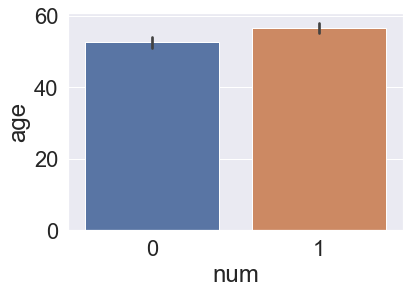

In [27]:
# average age of people with / out heart dieases
# plt.figure(figsize=(8,8))
sns.barplot(x='num', y='age', data=df)
plt.show()

Again, when we create a box plot related to the average of people who have / doesn’t have heart disease we can observe the younger people are less likely to have heart disease.

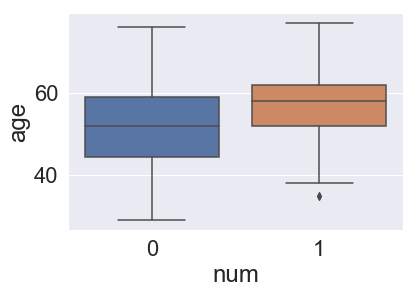

In [28]:
# box plot 
# plt.figure(figsize=(8,8))
sns.boxplot(x="num", y='age', data=df)
plt.show()

And finally, I wanted to show the pair plot against few of the attributes such as age, thal, ca 
(chest pain type), thalach ( maximum heart rate achieved) and presence of heart disease. And as seen in the correlation matrix we can observe a strong negative correlation between age and thalach.

<Figure size 1008x1008 with 0 Axes>

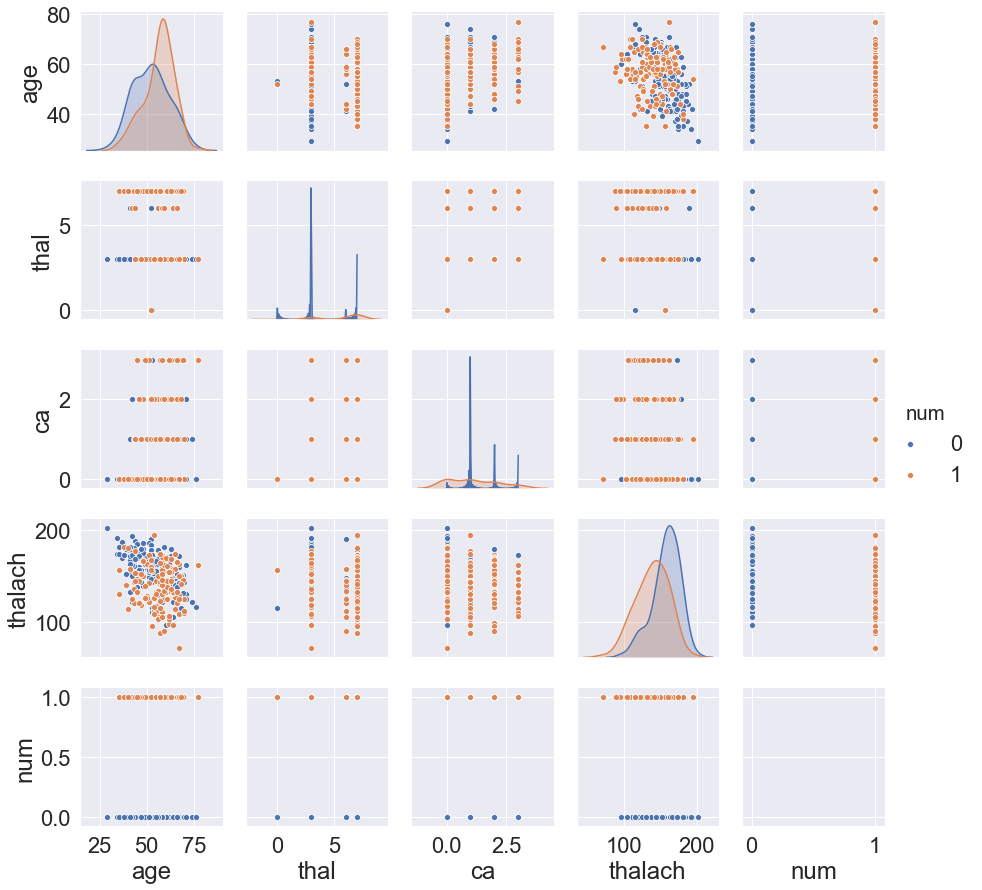

In [29]:
# show pair plot
plt.figure(figsize=(14,14))
sns.pairplot(df[['age','thal','ca','thalach','num']],hue='num')
plt.show()

## Uniform Manifold Approximation and Projection embedding (UMAP) t-distributed Stochastic Neighbor Embedding (t-SNE)

Run the following command from the terminal.

```bash
python Manifold_Approximation_and_Projection.py
```